In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
import numpy as np
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
import cv2
from sklearn import metrics
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [29]:
def load_data(data_directory, num_directories=8):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for i, d in enumerate(directories):
        if i >= num_directories:
            break
        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.lower().endswith((".png", ".jpg"))]
        
        for f in file_names:
            img = skimage.io.imread(f)
            images.append(img)
            labels.append(int(d))
            
    return images, labels

In [30]:
ROOT_PATH = "E:\objects"
train_data_directory = os.path.join(ROOT_PATH, "training") 
test_data_directory = os.path.join(ROOT_PATH, "testing")  

train_images, train_labels = load_data(train_data_directory, num_directories=3)

test_images, test_labels = load_data(test_data_directory, num_directories=3)


In [31]:
# Function to Preprocess Images for HOG
def preprocess_images_for_hog(images, size=(32, 32)):
    processed_images = []
    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
        
        # Convert to grayscale if it has three channels
        if resized_img.shape[-1] == 3:
            grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        else:
            grayscale_img = resized_img
        
        processed_images.append(grayscale_img)
    return np.array(processed_images)

In [32]:
# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(train_images)
test_images_processed = preprocess_images_for_hog(test_images)

In [33]:
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Compute HOG features for Training images
train_hog_features = []
for img in train_images_processed:
    hog_img = hog(img, visualize=False)
    train_hog_features.append(hog_img)

In [34]:
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Compute HOG features for test images
test_hog_features = []
for img in test_images_processed:
    hog_img = hog(img, visualize=False)
    test_hog_features.append(hog_img)

In [24]:
# from sklearn.cluster import KMeans

In [25]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(train_hog_features)
# train_cluster_labels = kmeans.labels_


In [26]:
# train_labels_with_clusters = np.column_stack((train_labels, train_cluster_labels))

In [27]:
# # Assuming you want to use k-means for test images as well
# test_hog_features = np.array(test_hog_features)
# test_hog_features = test_hog_features.reshape(test_hog_features.shape[0], -1)
# test_cluster_labels = kmeans.predict(test_hog_features)

In [23]:
# # Add cluster labels to test_labels
# test_labels_with_clusters = np.column_stack((test_labels, test_cluster_labels))

In [36]:
# Convert HOG features to a 1D array
train_hog_features_flat = np.array([feat.flatten() for feat in train_hog_features])
test_hog_features_flat = np.array([feat.flatten() for feat in test_hog_features])

# Apply k-means clustering
num_clusters = 3  # Number of clusters (you can adjust this based on your needs)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_clusters = kmeans.fit_predict(train_hog_features_flat)
test_clusters = kmeans.predict(test_hog_features_flat)

# Print cluster assignments for the first few images in the test set
print("Cluster assignments for the first few images in the test set:")
print(test_clusters[:100])

C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster assignments for the first few images in the test set:
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


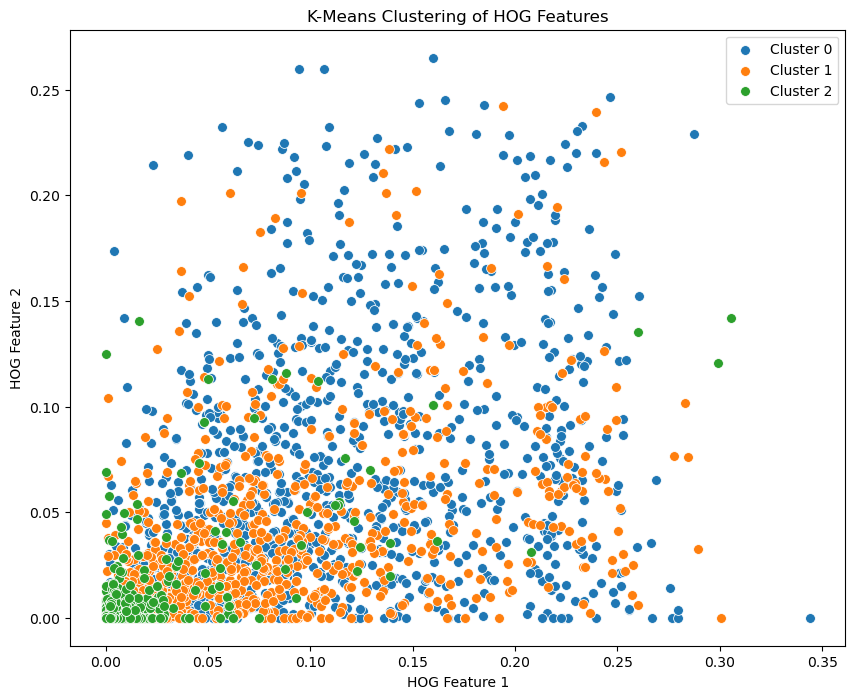

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Concatenate train and test data for visualization
all_hog_features_flat = np.concatenate([train_hog_features, test_hog_features])
all_clusters = np.concatenate([train_clusters, test_clusters])

# Create a DataFrame for seaborn
df = pd.DataFrame({'HOG Feature 1': all_hog_features_flat[:, 0],
                   'HOG Feature 2': all_hog_features_flat[:, 1],
                   'Cluster': all_clusters})

# Create a separate scatter plot for each cluster
plt.figure(figsize=(10, 8))
for cluster_label in np.unique(all_clusters):
    cluster_data = df[df['Cluster'] == cluster_label]
    sns.scatterplot(data=cluster_data, x='HOG Feature 1', y='HOG Feature 2', label=f'Cluster {cluster_label}', s=50)

plt.title('K-Means Clustering of HOG Features')
plt.legend()
plt.show()


C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

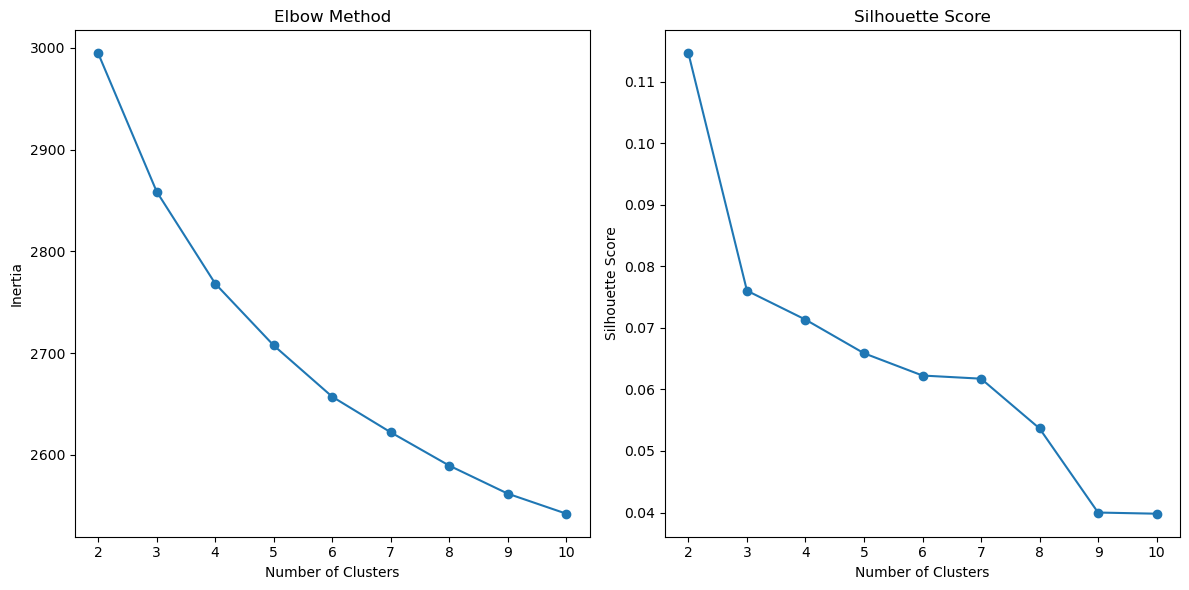

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming train_hog_features contains your HOG features

# Elbow Method
inertia_values = []
silhouette_scores = []
max_clusters = 10  # You can adjust this based on your dataset

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(train_hog_features)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(train_hog_features, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

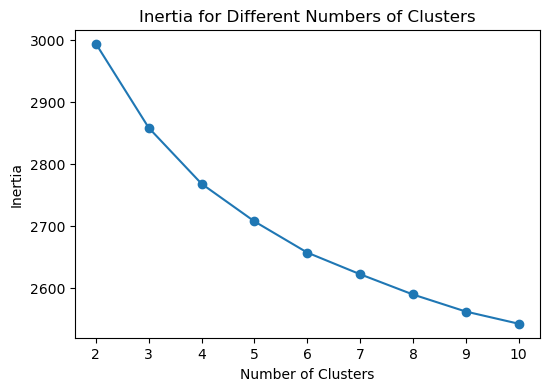

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming train_hog_features contains your HOG features

# Inertia calculation
inertia_values = []
max_clusters = 10  # You can adjust this based on your dataset

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(train_hog_features)
    inertia_values.append(kmeans.inertia_)

# Plotting Inertia
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), inertia_values, marker='o')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming train_hog_features contains your HOG features
num_clusters = 3  # You can adjust this based on your dataset

# Fit K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(train_hog_features)

# Calculate silhouette score
silhouette_avg = silhouette_score(train_hog_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.0760431359206689
